In [5]:
!mkdir -p extracted_model
!tar -xvf model.tar.gz -C extracted_model

tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
variables/
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
variables/variables.data-00000-of-00001
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
variables/variables.index
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
assets/
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
saved_model.pb
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
keras_metadata.pb
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
fingerprint.pb


In [6]:
!ls extracted_model

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [7]:
from keras.layers import TFSMLayer
import tensorflow as tf
import os
import tensorflow as tf

# Load the model as a layer
model_layer = TFSMLayer('extracted_model', call_endpoint='serving_default')

def load_and_preprocess_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [250, 250])  # match your model input
    img = img / 255.0  # normalize
    return img


2025-09-22 20:57:05.431437: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 259892256 exceeds 10% of free system memory.
2025-09-22 20:57:05.431512: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 259892256 exceeds 10% of free system memory.
2025-09-22 20:57:05.431611: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 259892256 exceeds 10% of free system memory.


In [30]:
folder_path = 'test_images/test_class0_1/'
image_paths = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path) if fname.endswith('.jpg')]
predictions = []

for path in image_paths:
    img = load_and_preprocess_image(path)
    img_batch = tf.expand_dims(img, axis=0)  # shape: (1, 250, 250, 3)
    output = model_layer(img_batch)
    prob = tf.squeeze(output['dense_1']).numpy()
    predictions.append((os.path.basename(path), prob))


In [31]:
class1 = []
class0 = []
for fname, prob in predictions:
    if label == 1:
        class1.append(1)
    if label == 0:
        class0.append(1)
    label = int(prob > 0.5)
    print(f"{fname} → Confidence: {prob:.2f}, Predicted class: {label}")
print("Class 1: ",len(class1)/(len(class1)+len(class0)))
print("Class 0: ",len(class0)/(len(class1)+len(class0)))


IMG_4961.JPG1.jpg2.jpg → Confidence: 1.00, Predicted class: 1
IMG_4961.JPG1.jpg3.jpg → Confidence: 0.89, Predicted class: 1
IMG_4961.JPG1.jpg4.jpg → Confidence: 0.98, Predicted class: 1
IMG_4961.JPG2.jpg4.jpg → Confidence: 0.87, Predicted class: 1
IMG_4961.JPG3.jpg1.jpg → Confidence: 1.00, Predicted class: 1
IMG_4961.JPG2.jpg1.jpg → Confidence: 0.95, Predicted class: 1
IMG_4961.JPG2.jpg2.jpg → Confidence: 0.99, Predicted class: 1
IMG_4961.JPG3.jpg2.jpg → Confidence: 0.96, Predicted class: 1
IMG_4961.JPG3.jpg3.jpg → Confidence: 0.94, Predicted class: 1
IMG_4961.JPG3.jpg4.jpg → Confidence: 0.91, Predicted class: 1
IMG_4961.JPG2.jpg3.jpg → Confidence: 0.81, Predicted class: 1
IMG_4961.JPG4.jpg3.jpg → Confidence: 1.00, Predicted class: 1
IMG_4961.JPG4.jpg2.jpg → Confidence: 0.92, Predicted class: 1
IMG_4961.JPG4.jpg1.jpg → Confidence: 0.91, Predicted class: 1
IMG_4961.JPG4.jpg4.jpg → Confidence: 1.00, Predicted class: 1
IMG_4962.JPG1.jpg1.jpg → Confidence: 0.44, Predicted class: 0
IMG_4962

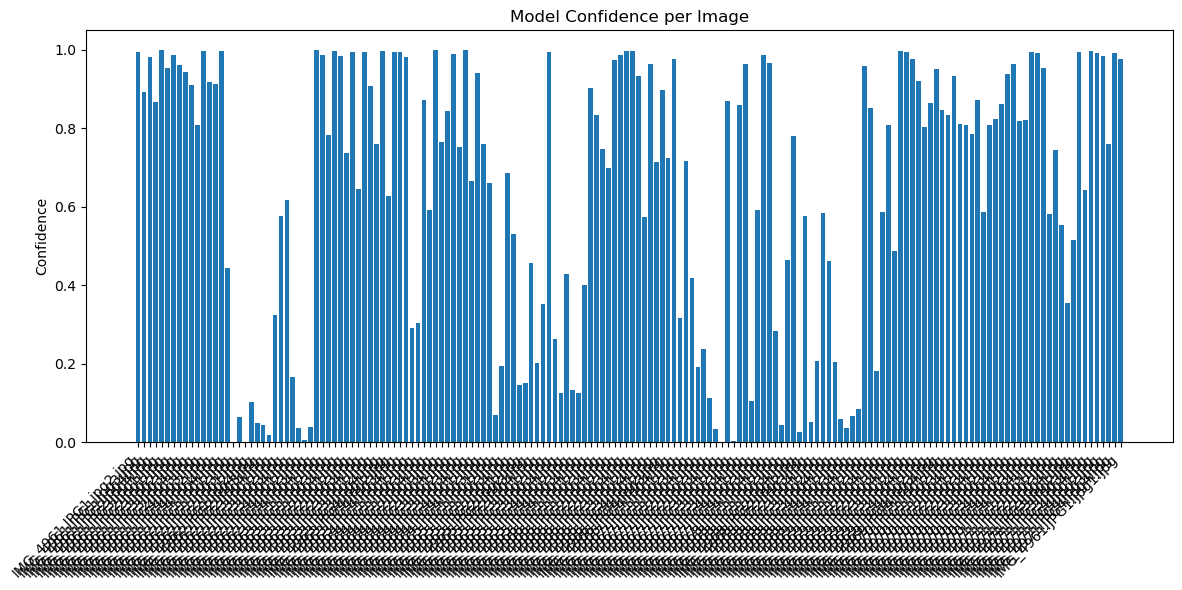

In [ ]:
import matplotlib.pyplot as plt

# Assuming predictions is a list of (filename, prob)
filenames = [fname for fname, _ in predictions]
probs = [prob for _, prob in predictions]

plt.figure(figsize=(12, 6))
plt.bar(filenames, probs)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Confidence')
plt.title('Model Confidence per Image')
plt.tight_layout()
plt.show()

In [11]:
import matplotlib.pyplot as plt

def show_predictions(image_paths, predictions, max_images=9):
    plt.figure(figsize=(12, 12))
    for i, (path, prob) in enumerate(predictions[:max_images]):
        img = tf.keras.utils.load_img(path, target_size=(250, 250))
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(f"{os.path.basename(path)}\nConfidence: {prob:.2f}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(image_paths, predictions)


FileNotFoundError: [Errno 2] No such file or directory: 'IMG_4961.JPG1.jpg2.jpg'

<Figure size 1200x1200 with 0 Axes>

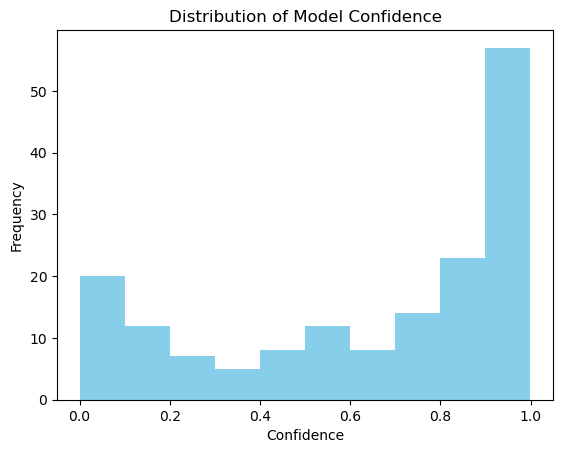

In [12]:
plt.hist(probs, bins=10, color='skyblue')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Model Confidence')
plt.show()
